# Test for characteristics extraction from FastText

In [1]:
import pandas as pd
from toke2emb import similarity
from numpy import dot
from numpy.linalg import norm
import numpy as np
import gensim

In [ ]:
def get_models(): 
    model_ab = ['es']
    model = {}
    for ab in model_ab:
        model[ab] = gensim.models.KeyedVectors.load_word2vec_format('./wiki.es.align.vec')
    return model
model = get_models()['es']

Initial vocab per category extracted from Kave products

In [3]:
model['rojo']

array([-0.076 ,  0.0026,  0.1089, -0.0819,  0.1013,  0.0444,  0.018 ,
        0.0823,  0.1341, -0.0019,  0.0278,  0.0245,  0.0633,  0.0161,
        0.1256,  0.0463, -0.1392, -0.0849,  0.0512,  0.0267,  0.0148,
       -0.0645, -0.13  ,  0.0238,  0.0401, -0.0497,  0.0614,  0.0296,
       -0.0275,  0.0336, -0.013 ,  0.0635,  0.1385,  0.0302,  0.0208,
        0.0284, -0.0825,  0.0118,  0.022 ,  0.019 ,  0.0051, -0.0127,
       -0.0281,  0.0324, -0.0729, -0.1271,  0.0107, -0.0907,  0.0272,
       -0.0385, -0.034 , -0.0054, -0.0423, -0.0624,  0.0381,  0.0558,
       -0.0396,  0.0535,  0.007 , -0.0278, -0.0253,  0.0089,  0.0102,
       -0.0275, -0.0238,  0.0449, -0.0613, -0.0528,  0.0083,  0.0553,
       -0.0894, -0.0701, -0.0524, -0.1088,  0.0344, -0.095 , -0.0628,
        0.0244,  0.002 , -0.045 ,  0.0209, -0.0037, -0.0411,  0.0041,
       -0.0236,  0.0406, -0.0404,  0.0364,  0.0024, -0.0589, -0.0963,
        0.0094, -0.07  ,  0.0758,  0.0991,  0.0559, -0.0293,  0.0638,
        0.0055,  0.0

In [4]:
cluster_dict = {
    "Material":{'ABS',
 'Albizia',
 'Aucoumea',
 'Betula',
 #'Borra',
 'Caña',
 'Cerámico',
 #'Cincha',
 'Contrachapado',
 'Cunninghamia',
 #'E0',
 #'E1',
 'EPS',
 #'Eichhornia',
 'Espuma',
 #'Estrophiolata',
 #'Eucalyptus',
 #'Excelsior',
 #'Fagus',
 'Felpa',
 #'Ficus',
 'Fimbristylis',
 'Fraxinus',
 'Hevea',
 #'Indica',
 #'Juglans',
 'Latón',
 'Lino',
 #'Mandshurica',
 #'Mangifera',
 'Mangium',
 'Melamina',
 'Melia',
 #'Petraea',
 #'Phyllostachys',
 #'Populus',
 #'Quercus',
 'Ratán',
 'Resina',
 'Saman',
 'Samanea',
 #'Swietenia',
 #'Sylvatica',
 'Tapizado',
 'Tectona',
 'Terrazo',
 'Textileno',
 'Triplochiton',
 'Ulmus',
 #'Xylia',
 'Yute',
 'Zea',
 'acrílicas',
 'alba',
 #'auriculiformis',
 'azedarach',
 #'brasiliensis',
 'búfalo',
 'cabra',
 #'camaldulensis',
 'costata',
 #'crassipes',
 #'edulis',
 'elastica',
 #'fresno',
 'galvanizado',
 'globulosa',
 #'grandis',
 #'klaineana',
 #'lanceolata',
 'lato',
 'maciza',
 #'macrophylla',
 'manufacturada',
 'marinas',
 'mays',
 'media',
 'naturales',
 'partículas',
 #'parvifolia',
 'pinaster',
 'radiata',
 'recicladas',
 'regia',
 #'scleroxylon',
 'sintética',
 'sintético',
 'spp.',
 #'sylvestris',
 'tablero',
 'tejer',
 'templado',
 'vaca',
 'vinilo',
 'viña',

    'madera',
    'haya',
    'fresno',
    'nogal',
    'cerezo',
    'caoba',
    'teca',
    'acacia',
    'pino',
    'arce',
    'roble',

    'Algodón',
    'Nylon',
    'Papel',
    'Cuerda',
    'Tejido',
    'Tela',
    'Piel',
    'Rafia',
    'Lana',

    'Plástico',
    'Policloruro',
    'Poliestireno',
    'Polietileno',
    'Polipropileno',
    'Poliuretano',
    'Poliéster',
    
    
    'Acero',
    'hierro',
    'Metal',
    'Aluminio',

    'Mármol',
    'hormigon',
    'cemento',
    'piedra'
                
 #'xylocarpa'},

               },
    "Color":{'Amarillo',
 'Azul',
 'Beige',
 'Blanco',
 'Cobre',
 'Dorado',
 'Gris',
 'Lila',
 'Marrón',
 'Mostaza',
 'Multicolor',
 'Naranja',
 'Natural',
 'Negro',
 'Plateado',
 'Rojo',
 'Rosa',
 'Transparente',
 'Turquesa',
 'Verde'},
    "Habitación":{'Baño',
 'Cocina',
 'Comedor',
 'Dormitorio',
 'Recibidor',
 'Salón',
 'terraza',
 'trabajo'}
}

**We read the precomputed embeddings of the vocab words**

In [46]:
emb = pd.read_pickle(r'test_embeddings.pickle')

In [ ]:
len(emb)

In [ ]:
emb_dict = dict(emb)

**Now we get the centroid of the embeddings per category**

In [5]:
def get_vector_centroid(crds1):
    '''
    Find the centroid of a set of vectors.

    @param crds: A matrix containing all of the vectors.

    @return: The centroid of the rows of the matrix crds.
    '''
    centroid1 = np.zeros(300)

    for i in range(len(crds1)):
        centroid1 += crds1[i]

    centroid1 /= float(len(crds1))

    return centroid1 

We create the category matrix to compute the centroid embedding

In [6]:
cluster_dict.keys()

dict_keys(['Material', 'Color', 'Habitación'])

In [7]:
cluster_dict["Material"]

{'ABS',
 'Acero',
 'Albizia',
 'Algodón',
 'Aluminio',
 'Aucoumea',
 'Betula',
 'Caña',
 'Cerámico',
 'Contrachapado',
 'Cuerda',
 'Cunninghamia',
 'EPS',
 'Espuma',
 'Felpa',
 'Fimbristylis',
 'Fraxinus',
 'Hevea',
 'Lana',
 'Latón',
 'Lino',
 'Mangium',
 'Melamina',
 'Melia',
 'Metal',
 'Mármol',
 'Nylon',
 'Papel',
 'Piel',
 'Plástico',
 'Policloruro',
 'Poliestireno',
 'Polietileno',
 'Polipropileno',
 'Poliuretano',
 'Poliéster',
 'Rafia',
 'Ratán',
 'Resina',
 'Saman',
 'Samanea',
 'Tapizado',
 'Tectona',
 'Tejido',
 'Tela',
 'Terrazo',
 'Textileno',
 'Triplochiton',
 'Ulmus',
 'Yute',
 'Zea',
 'acacia',
 'acrílicas',
 'alba',
 'arce',
 'azedarach',
 'búfalo',
 'cabra',
 'caoba',
 'cemento',
 'cerezo',
 'costata',
 'elastica',
 'fresno',
 'galvanizado',
 'globulosa',
 'haya',
 'hierro',
 'hormigon',
 'lato',
 'maciza',
 'madera',
 'manufacturada',
 'marinas',
 'mays',
 'media',
 'naturales',
 'nogal',
 'partículas',
 'piedra',
 'pinaster',
 'pino',
 'radiata',
 'recicladas',
 're

In [8]:
cluster_dict["Color"]

{'Amarillo',
 'Azul',
 'Beige',
 'Blanco',
 'Cobre',
 'Dorado',
 'Gris',
 'Lila',
 'Marrón',
 'Mostaza',
 'Multicolor',
 'Naranja',
 'Natural',
 'Negro',
 'Plateado',
 'Rojo',
 'Rosa',
 'Transparente',
 'Turquesa',
 'Verde'}

In [9]:
def get_mat(cat):
    matrix = []
    for word in cluster_dict[cat]:
        try:
            matrix.append(model[word.lower()])
        except:
            continue
    return matrix

In [10]:
centroids = dict()
for cat in cluster_dict.keys():
    centroids[cat] = get_vector_centroid(get_mat(cat))

## K-Means to find clusters inside "Materiales"

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [12]:
X = get_mat("Material")
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

[-72.27695735615897,
 -65.77228104321993,
 -62.92235330954325,
 -60.89195194553381,
 -58.777311520474335,
 -57.242620314425544,
 -56.154220142087965,
 -54.805445194617995,
 -53.53561101413657,
 -52.582546789615215,
 -51.05443696209799,
 -49.639513088474686,
 -48.73797262968342,
 -48.088127103262906,
 -46.525510666010014,
 -46.20348493952398,
 -45.18959205225543,
 -43.88670452110571,
 -42.653549757773135]

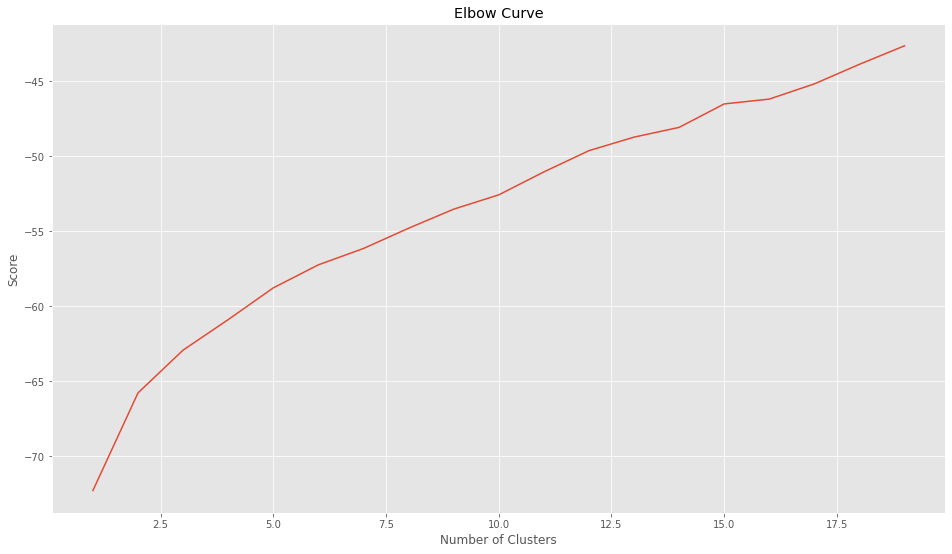

In [13]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [14]:
num_clust = dict()
num_clust["Material"] = 5
num_clust["Color"] = 2
num_clust["Habitación"] = 2

In [15]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.01695     0.02027143  0.03788571 ... -0.01259286 -0.00159286
   0.01154286]
 [ 0.01544286  0.02635238  0.03471905 ... -0.0036     -0.01725238
  -0.0248    ]
 [ 0.02529062  0.03345312  0.04129375 ... -0.01053437 -0.04725938
   0.01086563]
 [-0.01151667  0.00503333  0.05211111 ... -0.02692778 -0.04479444
  -0.03422222]
 [-0.00754444  0.0532      0.02431111 ...  0.00996667 -0.04488889
  -0.0008    ]]


In [16]:
km_centroid = dict()
for cat in cluster_dict.keys():
    km_centroid[cat] = []
for cat in cluster_dict.keys():
    kmeans = KMeans(n_clusters=num_clust[cat]).fit(get_mat(cat))
    centroids = kmeans.cluster_centers_
    km_centroid[cat].append(centroids)

In [17]:
km_centroid[cat]

[array([[ 4.80428562e-02,  5.28571449e-03,  2.92999995e-02,
         -3.44142858e-02,  2.71999999e-02,  9.52857227e-03,
         -5.09285718e-02,  3.10428578e-02,  8.16857123e-02,
          1.94285750e-03,  2.39000010e-02, -5.82714290e-02,
          1.33128574e-01,  4.50285721e-02,  2.01428573e-02,
          2.38000000e-02, -1.85714303e-03,  3.79999993e-03,
         -5.44428565e-02, -3.07285715e-02,  2.86714285e-02,
          1.13757142e-01, -1.04142859e-02,  2.78571432e-02,
          2.91285709e-02, -1.14571429e-02, -4.00714286e-02,
          2.14428570e-02,  4.01428595e-03,  1.00000096e-04,
         -4.61428602e-03, -1.01042859e-01,  2.77571431e-02,
         -7.39857150e-02,  2.74285707e-03, -4.79142873e-02,
         -5.18571419e-03, -1.47142912e-03, -2.65857141e-02,
         -3.63142867e-02,  4.22999997e-02,  7.98571482e-03,
         -4.25142857e-02, -2.16857142e-02, -5.34285724e-02,
         -3.75857135e-02, -4.29999961e-03, -1.42714282e-02,
         -5.07857147e-02, -6.77142924e-0

In [18]:
km_centroid["Material"]

[array([[ 0.01548947,  0.02169474,  0.02738421, ..., -0.00729474,
         -0.01603684, -0.01125789],
        [ 0.03845238,  0.03839048,  0.0369    , ..., -0.01907619,
         -0.02960952,  0.00055238],
        [ 0.00844167,  0.01914167,  0.05866667, ..., -0.03245   ,
         -0.00121667, -0.03451667],
        [ 0.00915789,  0.01882632,  0.04516316, ...,  0.00926842,
         -0.07581053,  0.00857368],
        [-0.01223478,  0.02918696,  0.03827826, ..., -0.01006522,
         -0.03155217, -0.00787391]])]

In [19]:
def most_sim(word, km_centroid):
    max_val = -999999
    sim  = -999999
    tag = None
    
    word = word.lower()
    if word is not None:
        
        try:
            a = model[word]
        except:
            tag = None
            max_val = None
            return (word, tag, max_val)

        for cat in km_centroid.keys():
                print(cat)
                for i in range(len(km_centroid[cat][0])):
                    print(i)
                    b = km_centroid[cat][0][i]
                    sim = dot(a, b)/(norm(a)*norm(b))
                    #sim = -np.linalg.norm(a-b) # minus eucl

                    if sim > max_val:
                        max_val = sim
                        tag = cat
    
    return (word, tag, max_val)

In [20]:
km_centroid

{'Material': [array([[ 0.01548947,  0.02169474,  0.02738421, ..., -0.00729474,
          -0.01603684, -0.01125789],
         [ 0.03845238,  0.03839048,  0.0369    , ..., -0.01907619,
          -0.02960952,  0.00055238],
         [ 0.00844167,  0.01914167,  0.05866667, ..., -0.03245   ,
          -0.00121667, -0.03451667],
         [ 0.00915789,  0.01882632,  0.04516316, ...,  0.00926842,
          -0.07581053,  0.00857368],
         [-0.01223478,  0.02918696,  0.03827826, ..., -0.01006522,
          -0.03155217, -0.00787391]])],
 'Color': [array([[-0.03847778,  0.01747778,  0.06718889, -0.05884444,  0.10762222,
           0.02875   ,  0.00892778,  0.04249444,  0.08549445,  0.02220556,
           0.02497222,  0.00665   ,  0.06085   ,  0.01056667,  0.07743889,
          -0.00170556, -0.10843889, -0.04781667,  0.01420556, -0.01753333,
           0.01093889, -0.07763889, -0.0759    ,  0.05469444,  0.02401111,
          -0.02387222,  0.05293333,  0.00827778, -0.02227778,  0.01478333,
      

In [21]:
all_words = []
for s in cluster_dict:
    print(s)
    for w in cluster_dict[s]:
        all_words.append(w)

Material
Color
Habitación


In [22]:
result = []
for i in range(len(all_words)):
    result.append(most_sim(all_words[i], km_centroid))

Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Habitación
0
1
Material
0
1
2
3
4
Color
0
1
Hab

In [23]:
result

[('costata', 'Material', 0.5756680372141074),
 ('tectona', 'Material', 0.6248434747010302),
 ('aluminio', 'Material', 0.7551017050554516),
 ('madera', 'Material', 0.7531038765872262),
 ('fresno', 'Material', 0.7051902937306406),
 ('hierro', 'Material', 0.6448300964286363),
 ('mays', 'Material', 0.4692452522422962),
 ('espuma', 'Material', 0.6271835183519875),
 ('yute', 'Material', 0.6905248468069639),
 ('felpa', 'Material', 0.5829133248157808),
 ('polipropileno', 'Material', 0.8286571019176534),
 ('vaca', 'Material', 0.5510791435761344),
 ('cunninghamia', 'Material', 0.7069788018426706),
 ('saman', 'Material', 0.41825330805827876),
 ('rafia', 'Material', 0.5828481573619678),
 ('arce', 'Material', 0.6605735111146911),
 ('zea', 'Material', 0.46579682132722555),
 ('radiata', 'Material', 0.6257955553232917),
 ('latón', 'Material', 0.7209692169966566),
 ('fimbristylis', 'Material', 0.7000789102642812),
 ('viña', 'Material', 0.285919980101805),
 ('globulosa', 'Material', 0.547948347410431),


In [24]:
len(result)

124

In [25]:
def lower(l):
    return [w.lower() for w in l]

In [26]:
c = 0
for tup in result:
    if tup[0] is not None and tup[1] is not None:
        if tup[0] in lower(cluster_dict[tup[1]]):
            c += 1
        else:
            print(tup[0])

naturales


In [27]:
c

121

In [28]:
c/len(result)

0.9758064516129032

In [29]:
len(cluster_dict["Material"])

96

In [30]:
tup = []
y = []
c = 0
for k in cluster_dict.keys():
    print(k)
    for word in cluster_dict[k]:
        #print(word)
        if word.lower() in model:
            emb = tuple(model[word.lower()])
            tup.append(emb)
            y.append(c)
        else:
            print("NOT FOUND")
    c += 1

Material
NOT FOUND
NOT FOUND
Color
Habitación


In [31]:
len(tup)

122

In [32]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [44]:
names = [str(i) for i in range(0,300)]
df = pd.DataFrame(tup, columns=names)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

In [52]:
X = []
for tu in tup:
    X.append(np.array(tu))
X = np.array(X)

In [47]:
len(X)

94

In [160]:
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (122, 302)


In [161]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [162]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [163]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[names].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09121193 0.06949035 0.04638808]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

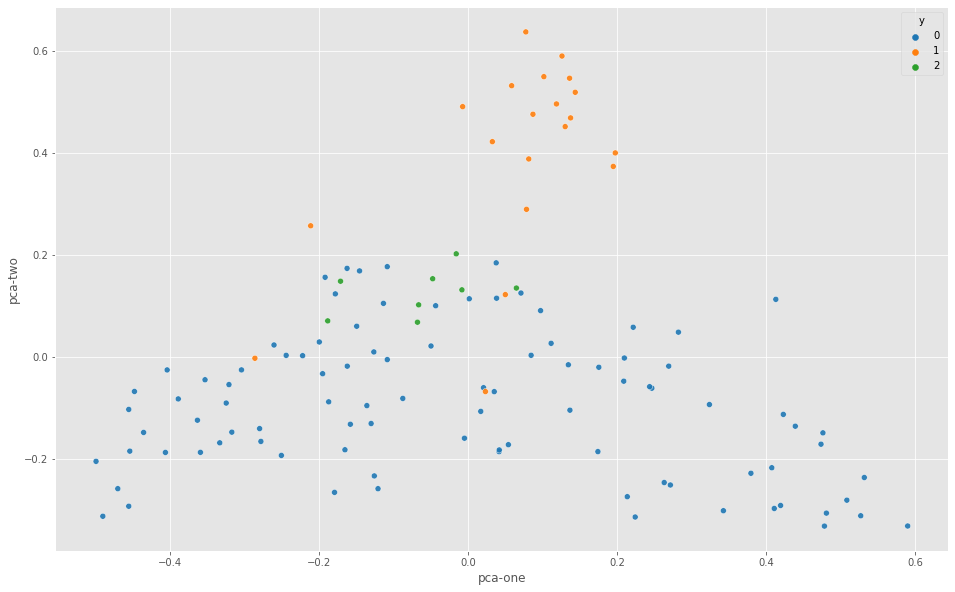

In [164]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("tab10", 3),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.9
)

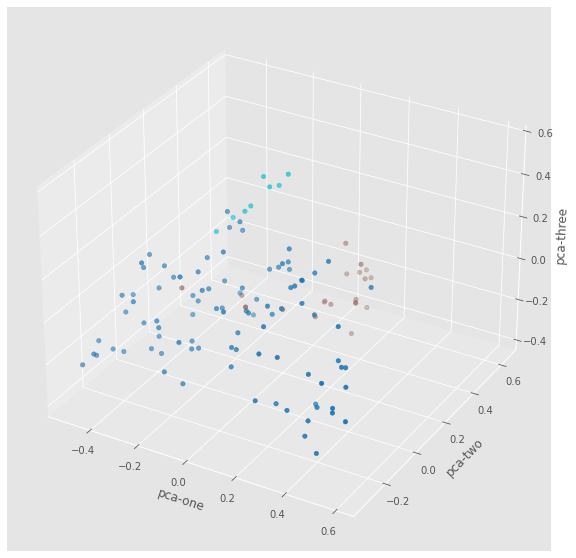

In [172]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], cmap='tab10', s=20
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [173]:
df.isnull().sum().sum()

0

In [174]:
df

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,y,label,pca-one,pca-two,pca-three
0,0.0059,0.0628,-0.0017,0.0097,0.0693,0.0894,0.0128,-0.1409,0.0706,-0.0139,...,0.0445,-0.0570,-0.0297,-0.0123,0.0319,0,0,-0.120667,-0.257833,-0.029964
1,-0.0200,-0.0494,0.1548,-0.0740,-0.0187,-0.0825,0.0425,-0.0565,0.0780,0.0809,...,-0.1076,0.0817,-0.0723,-0.0092,-0.1034,0,0,0.476347,-0.148316,-0.012675
2,0.0329,0.0687,0.0819,-0.0361,-0.0551,0.0075,-0.0048,-0.1209,0.0075,-0.0015,...,-0.0134,0.0052,-0.0222,-0.0720,0.0023,0,0,-0.455147,-0.292244,-0.179245
3,0.0294,0.0225,0.0379,0.0336,0.0289,0.0791,0.0124,-0.0778,0.0287,-0.0182,...,-0.0009,0.0210,0.0292,-0.1186,0.0087,0,0,-0.179023,-0.265037,-0.185350
4,-0.0073,0.0531,-0.0522,-0.0195,0.0572,0.0279,-0.0938,-0.0442,0.0423,0.0390,...,-0.0011,0.0065,0.0267,-0.0915,0.0170,0,0,0.001798,0.114677,0.109681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.1572,-0.0107,0.0306,-0.0514,0.0501,-0.0066,-0.0093,0.0176,0.0567,-0.0069,...,0.0406,-0.0401,-0.0814,-0.0247,-0.0610,2,2,-0.008072,0.132211,0.478149
118,0.1031,0.0131,-0.0184,-0.1049,0.0177,0.0750,-0.0317,0.0115,0.0200,0.0567,...,-0.0256,-0.0583,0.0750,-0.0386,-0.0438,2,2,-0.188166,0.071323,0.252131
119,0.0433,-0.0092,0.0501,-0.0408,-0.0053,0.0732,-0.0454,0.0346,0.1451,0.0401,...,0.0113,0.1225,-0.0675,-0.0953,-0.0233,2,2,-0.067715,0.068742,0.386468
120,0.0279,-0.0343,0.0914,-0.0474,0.0411,-0.0033,-0.0730,0.0267,0.0360,0.0165,...,-0.0177,-0.0602,-0.0859,-0.0339,0.0385,2,2,-0.015723,0.202872,0.440351


In [177]:
data_subset = df[names].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09121193 0.06949035 0.04638808]


In [178]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 122 samples in 0.000s...
[t-SNE] Computed neighbors for 122 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 122 / 122
[t-SNE] Mean sigma: 0.532574
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.140488
[t-SNE] KL divergence after 300 iterations: 0.274144
t-SNE done! Time elapsed: 0.22879815101623535 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

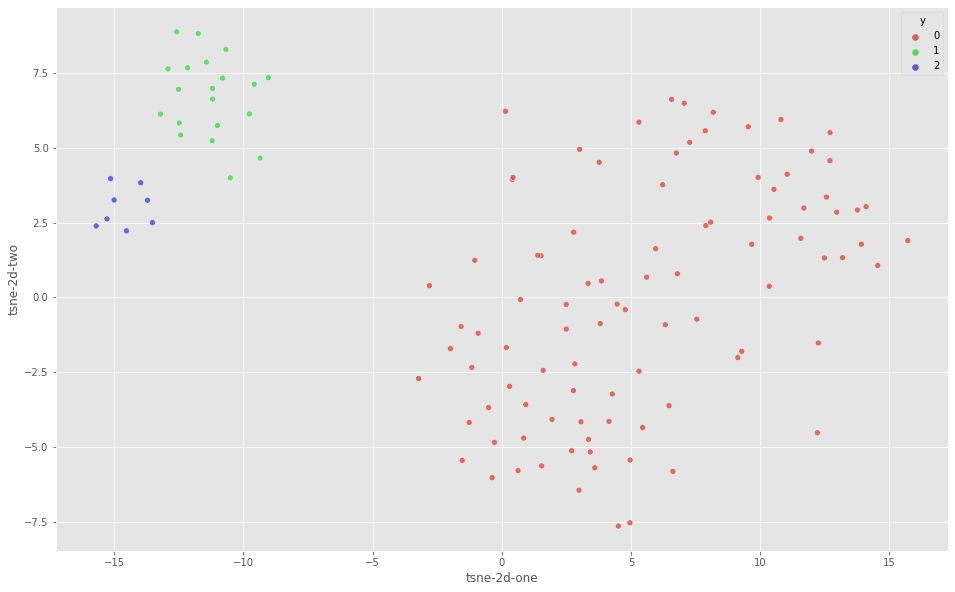

In [181]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.9
)

In [187]:
y = df.label.to_list()

In [218]:
len(list(model.key_to_index.keys()))

985667

In [259]:
def get_cat(cluster_dict, w):
    for k in cluster_dict.keys():
        for wo in list(cluster_dict[k]):
            if w.lower() == wo.lower():
                return k
    return str(0)

In [323]:
interesting_indx = []
for k in cluster_dict.keys():
    for w in list(cluster_dict[k]):
        if w.lower() in model:
            interesting_indx.append(model.get_index(w.lower()))

In [324]:
interesting_indx

[90105,
 320143,
 47280,
 20283,
 8340,
 560996,
 48899,
 223965,
 48653,
 5308,
 62213,
 10208,
 138582,
 83719,
 50858,
 7183,
 9028,
 138964,
 348467,
 50392,
 19638,
 8030,
 50656,
 8190,
 15129,
 1400,
 32820,
 3640,
 9462,
 14457,
 207918,
 585,
 8051,
 5748,
 86030,
 12538,
 7184,
 47980,
 7314,
 44674,
 150467,
 50019,
 1025,
 28634,
 22032,
 54034,
 173099,
 1250,
 4528,
 134094,
 2472,
 9039,
 80505,
 72270,
 200467,
 184753,
 6784,
 37691,
 11775,
 30241,
 123955,
 333681,
 117860,
 30689,
 2002,
 1328,
 20216,
 75011,
 1160,
 162457,
 523,
 28885,
 19981,
 156711,
 187170,
 48709,
 4980,
 354308,
 3536,
 28604,
 22926,
 28474,
 90888,
 4437,
 171326,
 6691,
 47128,
 26149,
 8843,
 153571,
 108112,
 5180,
 8407,
 18284,
 798,
 1084,
 32670,
 17801,
 4770,
 42387,
 4711,
 4572,
 12837,
 1076,
 4696,
 27427,
 34440,
 682,
 1193,
 16946,
 615,
 3491,
 2471,
 1140,
 88735,
 6362,
 14878,
 17353,
 272,
 3284,
 2091,
 12998]

In [325]:
list(model.key_to_index.keys())[:10]

['de', '</s>', ',', '.', 'la', 'en', 'el', 'y', '-', ')']

In [326]:
np.array(interesting_indx)

array([ 90105, 320143,  47280,  20283,   8340, 560996,  48899, 223965,
        48653,   5308,  62213,  10208, 138582,  83719,  50858,   7183,
         9028, 138964, 348467,  50392,  19638,   8030,  50656,   8190,
        15129,   1400,  32820,   3640,   9462,  14457, 207918,    585,
         8051,   5748,  86030,  12538,   7184,  47980,   7314,  44674,
       150467,  50019,   1025,  28634,  22032,  54034, 173099,   1250,
         4528, 134094,   2472,   9039,  80505,  72270, 200467, 184753,
         6784,  37691,  11775,  30241, 123955, 333681, 117860,  30689,
         2002,   1328,  20216,  75011,   1160, 162457,    523,  28885,
        19981, 156711, 187170,  48709,   4980, 354308,   3536,  28604,
        22926,  28474,  90888,   4437, 171326,   6691,  47128,  26149,
         8843, 153571, 108112,   5180,   8407,  18284,    798,   1084,
        32670,  17801,   4770,  42387,   4711,   4572,  12837,   1076,
         4696,  27427,  34440,    682,   1193,  16946,    615,   3491,
      

In [327]:
arr = np.arange(985667)
np.random.shuffle(arr)
arr[:1000]

array([323310, 282942, 153893, 637990, 762335, 538367, 875049, 706373,
       346938, 330236,  30941, 202435, 319719, 623082, 506682, 553614,
       776423, 179863, 739248, 820794, 157137, 425954, 465590, 800994,
       497848, 529437, 303699, 909885, 674709, 729396, 165117,  23187,
       272050, 116908, 648693,  30367, 478969,  23529, 216044, 335016,
       463509, 936621, 756086, 744970, 672082, 686514, 232429, 591956,
       124924, 966256, 184137, 414356, 717334, 763396, 803007, 305035,
       575612, 797925, 133734, 695057, 844339, 392078,  52054, 505394,
       777372,   6833, 489268, 267824, 400829, 698797, 615442, 255612,
       360571, 308463,  47164, 878903, 168992, 669808, 590947, 504491,
       984788, 302667, 640311, 638756, 254782, 210208, 976900, 885507,
       792326, 644085, 160252, 923349, 360187, 166931,  62062, 234837,
       461994, 451450, 724159, 972173,   4705, 563834, 969409, 242109,
       715352, 883752, 475320, 128171, 142419, 444763, 324718, 474682,
      

In [333]:
def tsne_plot(model, interesting_indx):
    "Creates and TSNE model and plots it"
    
    arr = np.arange(985667)
    np.random.shuffle(arr)
    ind = np.concatenate((arr[:20000], np.array(interesting_indx)))
    l = list(model.key_to_index.keys())
    labels = []
    v = []
    for i in ind:
        if i in interesting_indx:
            labels.append(get_cat(cluster_dict, l[i]))
        else:
            labels.append(str(0))
        v.append(model.vectors[i])
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(v)

    x = []
    y = []
    new_labels = []
    for i in range(0,len(new_values)):
        if labels[i] in ["Habitación", "Material", "Color"]:
            x.append(new_values[i][0])
            y.append(new_values[i][1])
            new_labels.append(labels[i])
    print(len(x))
    #for value in new_values:
    #    x.append(value[0])
    #    y.append(value[1])
    
    cdict = {"0": 'red', "Color": 'blue', "Material": 'green', "Habitación":"yellow"}
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i], c = cdict[new_labels[i]])
    plt.show()

123


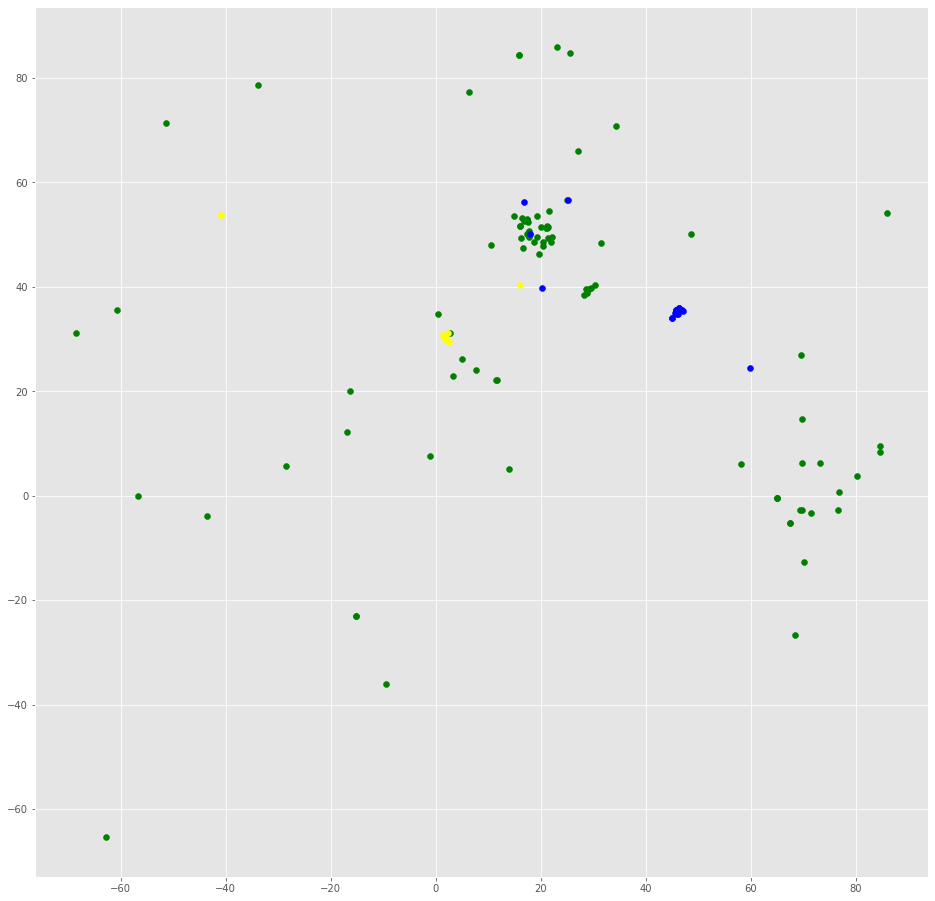

In [334]:
tsne_plot(model, interesting_indx)

In [332]:
new_labels

NameError: name 'new_labels' is not defined

In [314]:
list(model.key_to_index.keys())[:100]

['de',
 '</s>',
 ',',
 '.',
 'la',
 'en',
 'el',
 'y',
 '-',
 ')',
 'a',
 '(',
 'que',
 "'",
 'del',
 'los',
 'se',
 'por',
 'un',
 'con',
 'las',
 'una',
 'su',
 'es',
 'categoría',
 'para',
 'como',
 'al',
 'rd',
 'fue',
 'no',
 'más',
 'o',
 'score',
 'lo',
 'sus',
 'también',
 'entre',
 '#',
 'the',
 '#redirección',
 'este',
 'pero',
 '%',
 'años',
 'dos',
 'son',
 'sobre',
 'año',
 'le',
 'desde',
 'esta',
 'of',
 'enlaces',
 'ha',
 'hasta',
 'externos',
 'ciudad',
 'ser',
 'parte',
 'durante',
 'e',
 'sin',
 'donde',
 'san',
 'era',
 'nacional',
 'primera',
 'está',
 'team',
 '"',
 'cuando',
 'seed',
 'nombre',
 'estados',
 'utc',
 'siglo',
 'después',
 'españa',
 'ya',
 'tiene',
 'otros',
 'gran',
 'unidos',
 '/',
 's',
 'si',
 '–',
 'puede',
 'estado',
 'uno',
 'c',
 'lugar',
 'primer',
 'así',
 'm',
 'población',
 'muy',
 'había',
 'mismo']

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
# choosing and fitting a model
model = ExtraTreesClassifier(n_estimators=300, min_samples_leaf=10)
model.fit(X, y)

ExtraTreesClassifier(min_samples_leaf=10, n_estimators=300)

In [55]:
# let us apply to X
leaves = model.apply(X)

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
M = OneHotEncoder().fit_transform(leaves)

In [60]:
# we perform M*M.transpose(), which is the same to 
# computing all the pairwise co-ocurrences in the leaves 
S = (M*M.transpose()).todense()

# lastly, we normalize and subtract from 1, to get dissimilarities
D = 1 - S/S.max()

In [62]:
from sklearn.manifold import TSNE

In [63]:
# computing 2D embedding with tsne, for visualization purposes
 embed = TSNE(metric='precomputed', perplexity=30).fit_transform(D)

/home/gonzalo/.local/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


In [64]:
embed

array([[  7.26987   ,  -8.508409  ],
       [  7.134753  , -10.551061  ],
       [ -5.196019  ,  -7.5237107 ],
       [ -4.4167533 ,  -5.823594  ],
       [  6.054389  ,  -2.5604866 ],
       [ -7.826955  ,  -6.2672725 ],
       [  3.437709  ,  -5.1256447 ],
       [ -1.0164214 ,  -8.484509  ],
       [  1.0185175 ,  -6.0850554 ],
       [ -3.1059518 , -11.383486  ],
       [ -2.5866933 ,  -7.0174494 ],
       [  2.9928827 ,  -1.7227342 ],
       [  6.2100415 ,  -8.660076  ],
       [  3.6998878 , -10.875251  ],
       [  1.9700911 ,  -3.6629095 ],
       [  5.886307  ,  -2.783463  ],
       [  3.2162576 ,  -6.1450353 ],
       [  7.6946855 ,  -8.470854  ],
       [ -7.274778  ,  -8.099104  ],
       [  5.7710686 ,  -9.993465  ],
       [ -0.6189811 ,  -0.09646352],
       [  7.990671  ,  -9.425159  ],
       [  7.087213  ,  -4.894859  ],
       [  1.7636602 ,  -6.4616413 ],
       [  0.81901526,  -8.655855  ],
       [  2.9378984 ,  -1.7564288 ],
       [  1.4415077 , -11.117198  ],
 

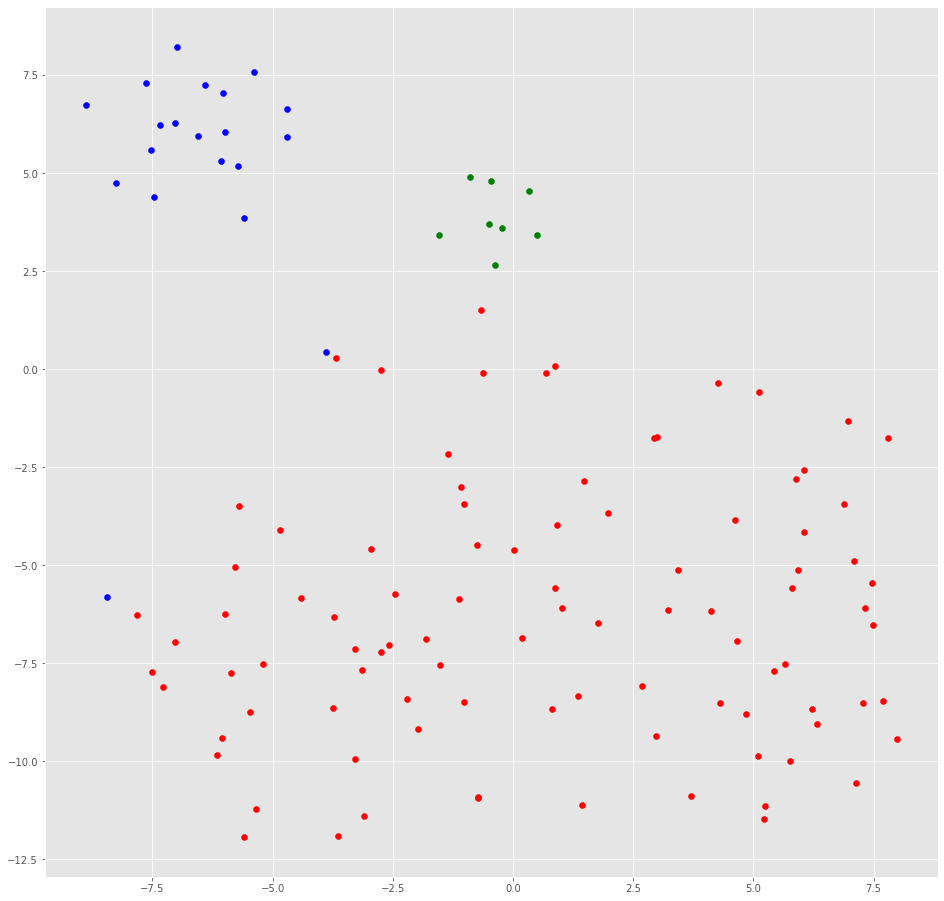

In [71]:
plt.figure(figsize=(16, 16)) 
cdict = {"0": 'red', "1": 'blue', "2": 'green', "3":"yellow"}
for i in range(len(embed)):
    plt.scatter(embed[i][0],embed[i][1], c = cdict[str(y[i])])
plt.show()